## Import necessary python modules

In [1]:
from streakimage import StreakImage

# We import heatmap.ipynb to easily plot heatmaps
import import_ipynb
from heatmap import heatmap

importing Jupyter notebook from heatmap.ipynb


## Import Data

### Load background

In [5]:
path_to_bg = "files/example_bg ST4 g20 20x556ms.img"
bg = StreakImage(path_to_bg)

### Load image

In [6]:
path_to_img = "files/example_streak-image ST4 g20 20x556ms.img"
image =  StreakImage(path_to_img, bg=bg)

### Plot raw data

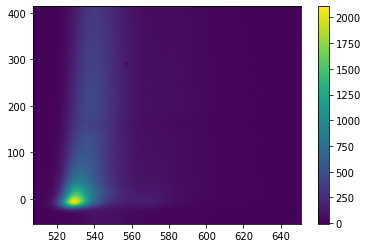

In [7]:
heatmap(image.data)

## Correct image stepwise

calculate offset from 'dark' area in image

In [ ]:
wl_from = 
wl_to = 
time_from = 
time_to = 

offset = 